# C 5.0 

In [ ]:
#Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv', 
                 index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
x = df.iloc[:,:-1]
y = df['Species']

In [4]:
y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [6]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
92,6.1,3.0,4.6,1.4
136,7.7,3.0,6.1,2.3
70,5.6,2.5,3.9,1.1
129,6.4,2.8,5.6,2.1
115,5.8,2.8,5.1,2.4


In [7]:
ytrain

Id
92     Iris-versicolor
136     Iris-virginica
70     Iris-versicolor
129     Iris-virginica
115     Iris-virginica
            ...       
134     Iris-virginica
138     Iris-virginica
73     Iris-versicolor
141     Iris-virginica
38         Iris-setosa
Name: Species, Length: 120, dtype: object

In [8]:
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
15,5.8,4.0,1.2,0.2
99,5.1,2.5,3.0,1.1
76,6.6,3.0,4.4,1.4
17,5.4,3.9,1.3,0.4
132,7.9,3.8,6.4,2.0


In [11]:
ytest

Id
15         Iris-setosa
99     Iris-versicolor
76     Iris-versicolor
17         Iris-setosa
132     Iris-virginica
57     Iris-versicolor
142     Iris-virginica
45         Iris-setosa
30         Iris-setosa
121     Iris-virginica
95     Iris-versicolor
6          Iris-setosa
103     Iris-virginica
52     Iris-versicolor
79     Iris-versicolor
43         Iris-setosa
93     Iris-versicolor
67     Iris-versicolor
32         Iris-setosa
36         Iris-setosa
91     Iris-versicolor
85     Iris-versicolor
78     Iris-versicolor
41         Iris-setosa
126     Iris-virginica
100    Iris-versicolor
34         Iris-setosa
20         Iris-setosa
74     Iris-versicolor
147     Iris-virginica
Name: Species, dtype: object

In [43]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [46]:
dt.feature_importances_

array([0.01054122, 0.01710372, 0.67387845, 0.29847662])

# Model Evaluation

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [49]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [50]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.9666666666666667

In [51]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.97


In [25]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

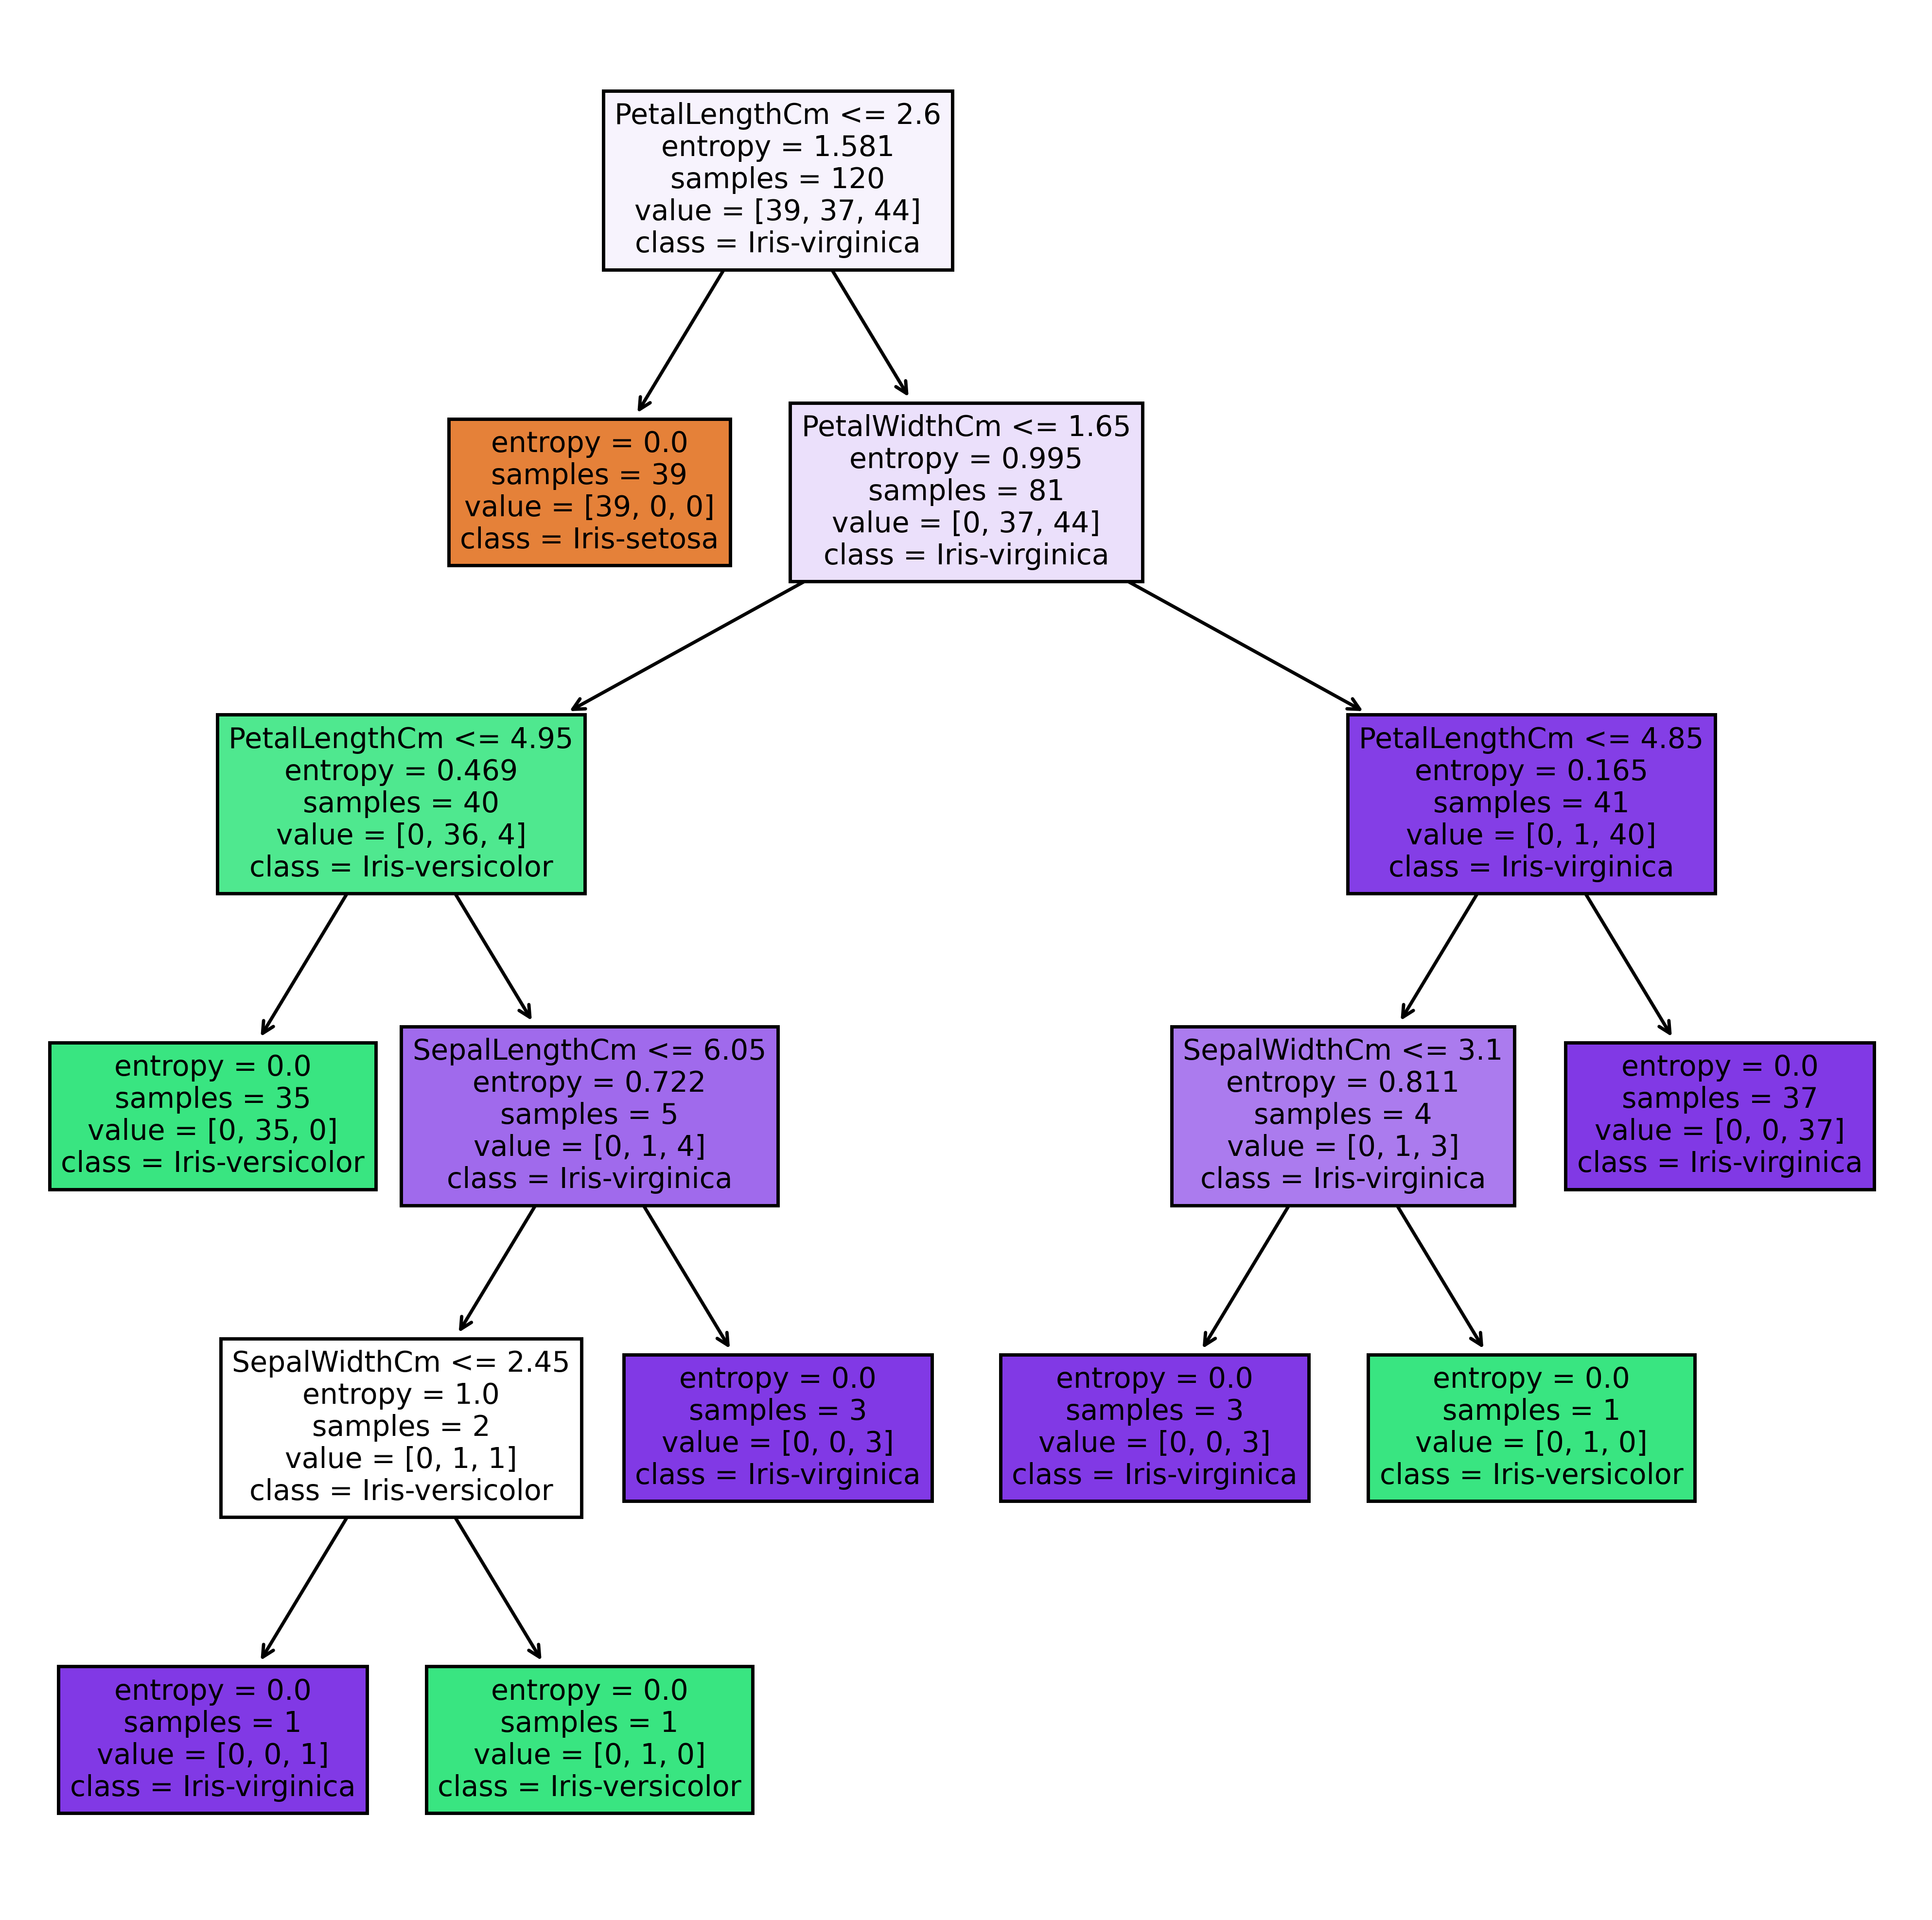

In [32]:
tree.plot_tree(dt,feature_names=x.columns, class_names=df['Species'].unique(), filled=True)
plt.show()

In [34]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [33]:
dt.feature_importances_ #It returns information gain of all columns

array([0.00848378, 0.02764493, 0.67387845, 0.28999284])

# CART

<code>CLASSIFICATION</CODE>

In [ ]:
df.head()

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini')

In [ ]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

In [ ]:
print(classification_report(ytest,ypred))

In [ ]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

# Regression

In [ ]:
df.head()

In [ ]:
x = df.iloc[:,:3]
y = df['PetalWidthCm']

In [ ]:
x

In [ ]:
y

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

In [ ]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(ytest,yp)
import numpy as np
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
x.columns

In [ ]:
plt.figure(figsize = (20,20),dpi = 500)
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], filled=True)
plt.show()

# Hyperparameter tuning

In [ ]:
DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'splitter' :['best','random']
}

In [ ]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [ ]:
grid.fit(xtrain,ytrain)

In [ ]:
grid.best_params_

In [ ]:
dtr = DecisionTreeRegressor(criterion='absolute_error',
                           max_depth=8,splitter='random')

In [ ]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [ ]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

In [ ]:
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],filled=True, max_depth =2 )
plt.show()